# Выпускной проект. Анализ оттока клиентов банка.

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. Последнее время в банке повысился отток клиентов, это начинается становиться проблемой, которая угрожает существованию банка.

Цель: проанализировать клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка.

Задачи:
1. Загрузка данных и изучение общей информации
2. Предобработка данных
   - Проверка корректности наименований колонок
   - Переименование колонок
   - Исследование пропущенных значений
   - Проверка на дубликаты
   - Исследование соответствия типов
   - Приведение типов
3. Проведение исследовательского анализа данных
   - Исследование корреляций
   - Исследование портретов клиентов, которые склонны уходить из банка
4. Выделение сегментов и их приоритизация
5. Формулирование и проверка статистических гипотез
   - Поиск наличия взаимосвязи между оттоком клиентов и отнесения клиентов к определенному сегменту
6. Формулирование выводов и рекомендаций
   - Определить, какие признаки влияют на отток клиентов
   - Определить, какие значения этих признаков связаны с оттоком
   - Рекомендации по приоритетным сегментам
7. Презентация

Ссылка на презентацию: https://drive.google.com/file/d/1nSrZOEVBNzX9Lgebzgg0RCEx8lwhNOOO/view?usp=sharing

Ссылка на дашборд: https://public.tableau.com/app/profile/katya6922/viz/_16809647700520/Dashboard1?publish=yes

### Загрузка данных и изучение общей информации

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objects as go
!pip install phik
import phik
from phik.report import plot_correlation_matrix
from phik import report
from scipy import stats as st

     |████████████████████████████████| 679 kB 1.5 MB/s eta 0:00:01


In [2]:
try:
    banks = pd.read_csv('bank_scrooge.csv', sep=',')
except:
    banks = pd.read_csv(r'C:\Users\katya\Downloads\bank_scrooge.csv')

display(banks.head(10))
banks.info()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


В датасете представлено 10000 клиентов банка. Столбцы city и gender хранят значения типа object - значит они хранят нечисловые значения или пропуски. Столбцы score, age, balance, EST_SALARY хранят значения типа float64 (вещественные переменные), а столбцы USERID, equity, products, credit_card, last_activity, churn - значения типа int64 (целочисленные переменные).

### Предобработка данных

Переименуем некоторые названия столбцов на более подходящие:

In [3]:
banks = banks.rename(columns={"USERID": "user_id", "EST_SALARY": "est_salary"})

Проверим датасет на наличие пропусков и явных дубликатов:

In [4]:
print(banks.isna().sum()) # посчитаем количество пропусков в столбцах
print('Количество явных дубликатов:',banks.duplicated().sum()) # подсчёт явных дубликатов

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64
Количество явных дубликатов: 0


Явных дубликатов в датасете не оказалось, а вот пропуски есть. В столбце age - 26 пропусков, в столбце balance - 2295.

Проверим датасет на наличие неявных дубликатов:

In [5]:
banks['user_id'].duplicated().sum()

73

In [6]:
banks = banks.drop_duplicates(['user_id'])

В столбце user_id оказалось 73 неявных дубликата. Было принято решение их удалить, так как их не так много (это не повлияет на дальнейшее исследование), а user_id клиента должен быть уникальным.

In [7]:
print(banks.isna().sum())

user_id             0
score               0
city                0
gender              0
age                 4
equity              0
balance          2260
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64


In [8]:
banks.dropna(subset = ['age'], inplace=True)

В столбце age осталось всего 4 пропуска - так же удалим их. В столбце balance восполнять пропуски мы не будем, так как у нас нет данных для обработки пропусков. Удалять пропуски так же не будем, так как это может исказить дальнейшее исследование.

Приведем типы данных в некоторых столбцах к более подходящим:

In [9]:
banks['score'] = banks['score'].astype('int')
banks['city'] = banks['city'].astype('str')
banks['gender'] = banks['gender'].astype('str')
banks['age'] = banks['age'].astype('int')

Избавимся от строки с клиентом, у которого 0 продуктов (скорее всего это ошибка в данных):

In [10]:
banks = banks[banks.products !=0]

На этапе предобработки данных мы заменили названия некоторых столбцов на более подходящие; проверили датасет на наличие пропусков, а так же явных и неявных дубликатов. Было принято решение удалить пропуски и дубликаты, удаление которых не повлияет на дальнейшее исследование. Так же мы привели типы данных в некоторых столбцах к более подходящим.

### Исследовательский анализ данных

Исследуем данные на корреляции:

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']


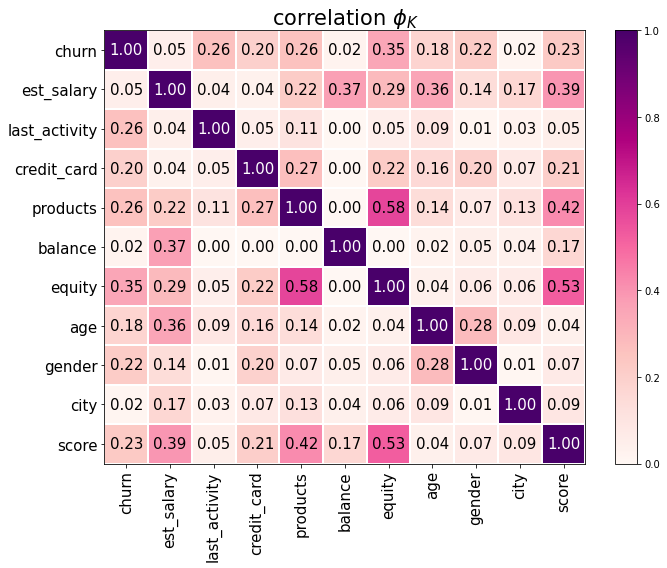

In [11]:
corr_banks = banks.drop(['user_id'], axis=1)

phik_banks = corr_banks.phik_matrix()

plot_correlation_matrix(phik_banks.values, 
                        x_labels=phik_banks.columns, 
                        y_labels=phik_banks.index, 
                        vmin=0, vmax=1, color_map="RdPu", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.tight_layout()

<AxesSubplot:>

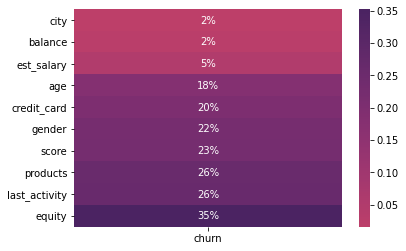

In [12]:
sns.heatmap(phik_banks.loc[:,['churn']].drop('churn').sort_values('churn'),annot=True, fmt=".0%", cmap="flare", center=0)

Судя по графику корреляций, можем заметить, что на отток клиентов в большей степени могут влиять такие показатели, как количество баллов собственности, активность, количество используемых продуктов, скоринговый балл, пол, наличие кредитной карты, возраст.

Посмотрим на распределения процентов отточных клиентов по различным признакам:

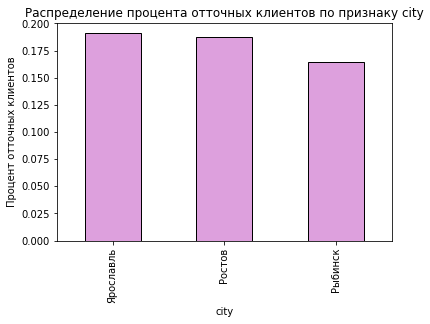

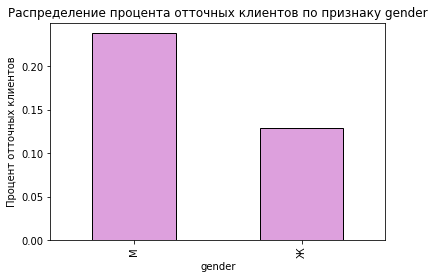

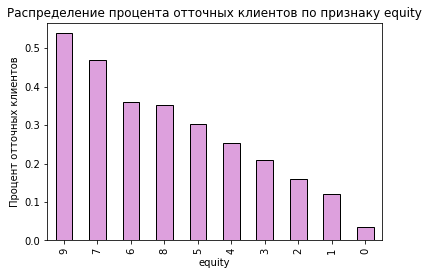

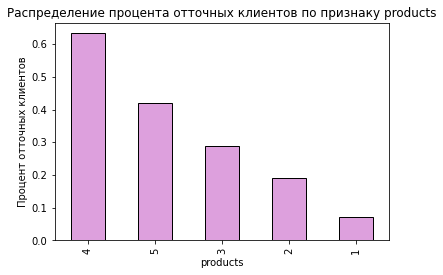

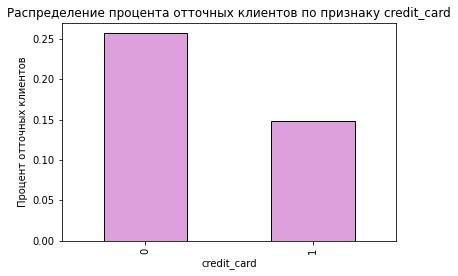

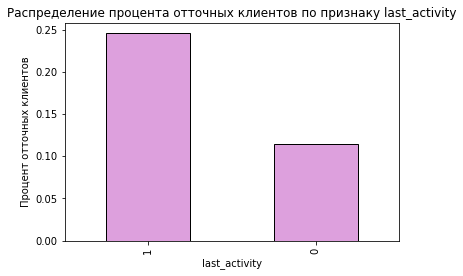

In [13]:
for column in ['city','gender','equity','products','credit_card', 'last_activity']:
    percent = banks.groupby(column, as_index=False).agg(churn_count=('churn','sum'), count=('churn','count'))
    percent['ratio'] = percent['churn_count']/percent['count']
    percent[[column, 'ratio']].sort_values(by='ratio',ascending = False).plot(x=column, kind='bar', color = "plum", edgecolor = 'black', legend=None) 
    plt.ylabel("Процент отточных клиентов")
    plt.title(f'Распределение процента отточных клиентов по признаку {column}')
    plt.show()

Из полученных графиков распределений можно сделать следующие выводы:
  - Город почти не связан с оттоком клиентов. Процент отточных клиентов в Ярославле и Ростове почти одинаковый, в Рыбинcке меньше, но не намного.
  - Мужчины больше подвержены оттоку, они уходят почти вдвое чаще, чем женщины.
  - Клиенты с большим количеством баллов собственности уходят чаще. Самый высокий процент отточных клиентов с 7 и 9 баллами собственности. Еще меньше с 6 и 8 баллами собственности. И далее, от 5 баллов собственности, с убыванием баллов, уменьшается процент отточных клиентов (самый меньший процент отточных клиентов с 0-ми баллами собственности).
  - Больше всего подвержены оттоку клиенты, пользующиеся 4-мя продуктами банка. Далее, по проценту отточных клиентов, идут клиенты, пользующиеся 5-ю, 3-мя и 2-мя продуктами. Меньше всего процента отточных клиентов, пользующихся одним продуктом банка.
  - Клиенты без кредитной карты больше подвержены оттоку, они уходят почти вдвое чаще, чем клиенты с кредитной картой.
  - Активные клиенты больше подвержены оттоку, они уходят почти вдвое чаще, чем неактивные клиенты.

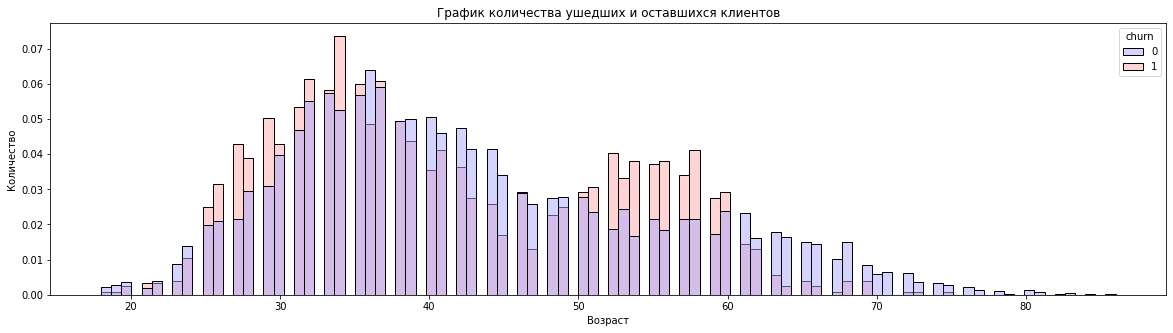

In [14]:
fig = plt.figure(figsize=(20, 5))
sns.histplot(data=banks, hue="churn", x="age", stat="density", common_norm=False, palette="bwr", bins=100)
plt.title('График количества ушедших и оставшихся клиентов')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

Из графика можно сделать вывод, что среди клиентов в возрасте от 25 до 35 лет (примерно) преобладают клиенты, которые ушли из банка. От 25 до 50 лет уже гораздо меньше отточных клиентов. С 50 до 60 лет отточные клиенты сильно преобладают над оставшимися в банке. И после 60 лет оставшихся в банке клиентов больше. Можно так же заметить, что клиентов после 60 лет уже гораздо меньше, как и клиентов до 25 лет (до 25 так же преобладают оставшиеся клиенты).

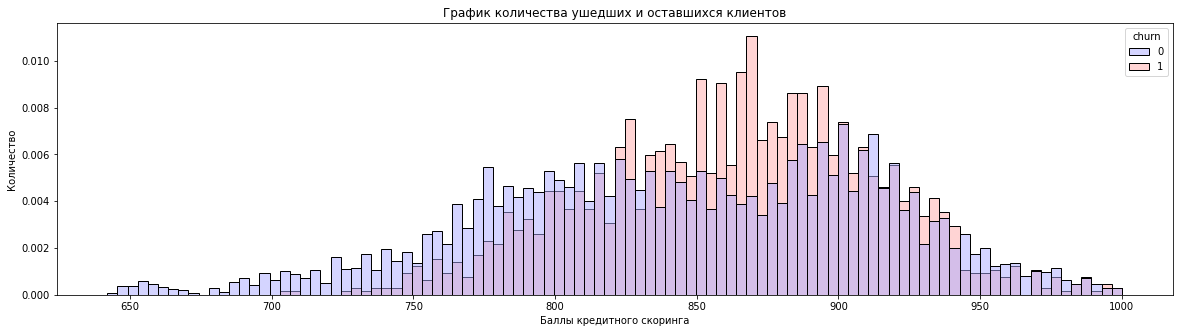

In [15]:
fig = plt.figure(figsize=(20, 5))
sns.histplot(data=banks, hue="churn", x="score", stat="density", common_norm=False, palette="bwr", bins=100)
plt.title('График количества ушедших и оставшихся клиентов')
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Количество')
plt.show()

Клиенты с баллами примерно от 650 до 825 являются менее отточными. Среди клиентов с баллами от 825 до 900 преобладают отточные клиенты. А среди клиентов с баллами от 900 до 950 более равномерно распределены отточные и оставшиеся в банке клиенты (на некоторых промежутках все же есть как преобладание отточных клиентов, так и преобладание оставшихся клентов). Клиенты с баллами больше 950 менее отточны (но всего клиентов с таким количеством баллов не так уж и много). 

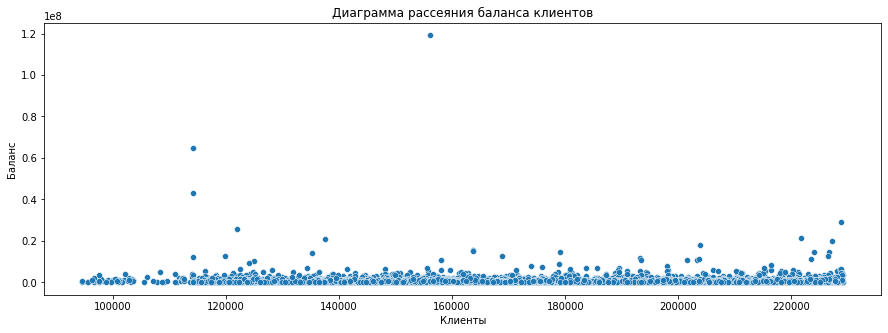

In [16]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=banks, x='user_id', y='balance')
plt.title('Диаграмма рассеяния баланса клиентов')
plt.xlabel('Клиенты')
plt.ylabel('Баланс')
plt.show()

Из графика можем заметить, что есть клиент с балансом около 120 миллионов, а так же клиенты с балансом от 3 до 80 миллионов. Совсем удалять из таблицы мы таких клиентов не будем (так как это не аномалии в данных, такие клиенты действительно могут быть), но при исследование распредения клиентов по балансу мы их учитывать не будем, так как все таки таких клиентов немного. 

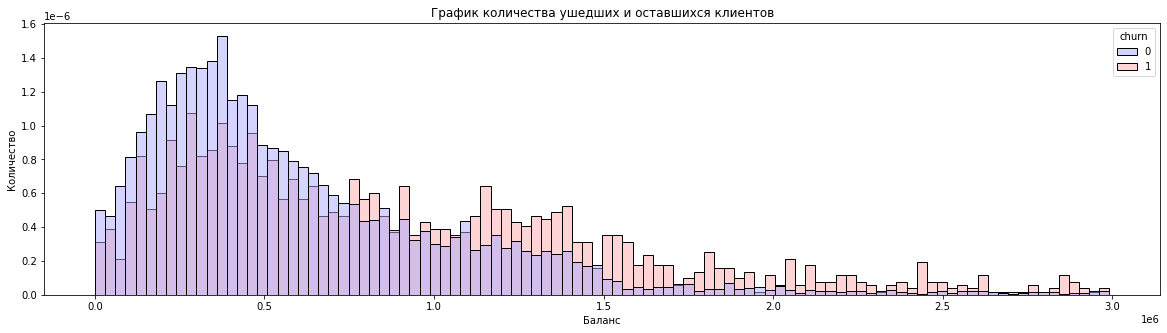

In [17]:
fig = plt.figure(figsize=(20, 5))
sns.histplot(data=banks[banks['balance']<3000000], hue="churn", x="balance", stat="density", common_norm=False, palette="bwr", bins=100)
plt.title('График количества ушедших и оставшихся клиентов')
plt.xlabel('Баланс')
plt.ylabel('Количество')
plt.show()

По графику можно сделать вывод, что среди клиентов с балансом до 750 тысяч преобладают оставшиеся в банке клиенты. Клиенты с балансом больше 750 тысяч более отточны, но в целом всего клиентов с таким балансом гораздо меньше, чем клиентов с балансом до 750 тысяч.

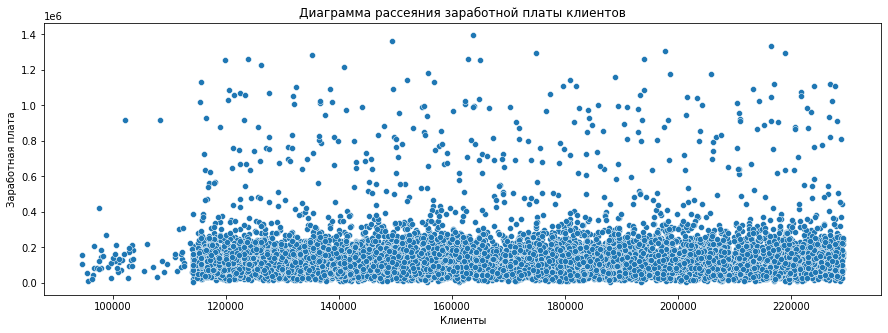

In [18]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=banks, x='user_id', y='est_salary')
plt.title('Диаграмма рассеяния заработной платы клиентов')
plt.xlabel('Клиенты')
plt.ylabel('Заработная плата')
plt.show()

Для более реперезентативного графика распределения клиентов по заработной плате будем рассматривать клиентов с заработной платой до 400 тысяч.

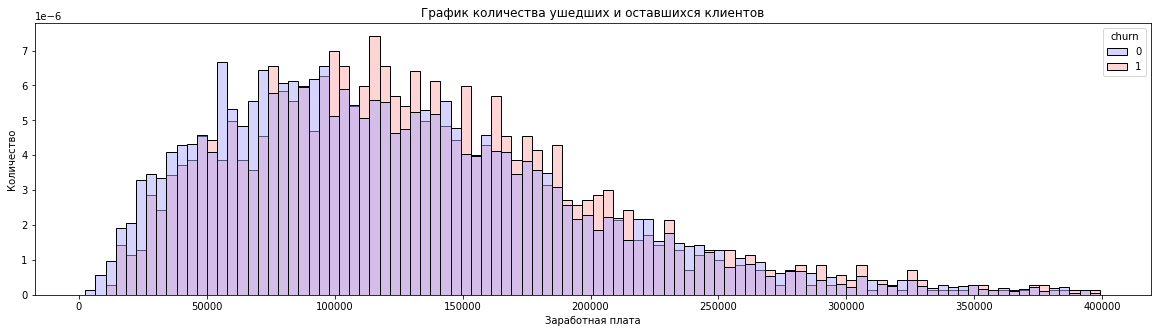

In [19]:
fig = plt.figure(figsize=(20, 5))
sns.histplot(data=banks[banks['est_salary']<400000], hue="churn", x="est_salary", stat="density", common_norm=False, palette="bwr", bins=100)
plt.title('График количества ушедших и оставшихся клиентов')
plt.xlabel('Заработная плата')
plt.ylabel('Количество')
plt.show()

Среди клиентов с заработной платой до 100 тысяч преобладают оставшиеся в банке клиенты. Клиенты с заработной платой больше 100 тысяч в основном являются более отточными.

Из исследовательского анализа можно сделать следующие выводы:

- На отток клиентов в большей степени могут влиять такие показатели, как количество баллов собственности, активность, количество используемых продуктов, скоринговый балл, пол, наличие кредитной карты, возраст.

Портрет отточного клиента:

- Больше подвержены оттоку мужчины
- Большее количество отточных клиентов в возрасте от 25 до 35 лет и от 50 до 60 лет
- Больше отточных клиентов в Ярославле и Ростове
- Скоринговый балл от 825 до 910
- Высокие баллы собственности (6-9 баллов)
- Баланс больше 750 тысяч
- Пользование 4+ продуктами
- Нет кредитной карты
- Активный клиент
- Заработная плата больше 100 тысяч

### Выделение сегментов и их приоритизация

In [20]:
product = banks.groupby('products', as_index=False).agg(churn_count=('churn','sum'), count=('churn','count'))
product['ratio'] = product['churn_count']/product['count']
product

,products,churn_count,count,ratio
0,1,235,3306,0.071083
1,2,978,5095,0.191953
2,3,297,1028,0.288911
3,4,300,474,0.632911
4,5,8,19,0.421053


Можем сразу отметить, что клиенты с 4+ продуктами являются отточными и их можно сразу выделить в сегмент.

In [21]:
banks.query('products==4 or products==5').agg({"churn":['mean','count']})

,churn
mean,0.624746
count,493.000000


На этапе исследовательского анализа мы заметили, что высокоотточными являются клиенты в возрасте от 25 до 35 лет, а так же клиенты от 50 до 60 лет. Попробуем выделить сегменты на основе этих данных:

In [22]:
banks.query('age>25 and age<35 and last_activity==1 and credit_card==0').agg({"churn":['mean','count']})

,churn
mean,0.508434
count,415.000000


Еще один высокооточный сегмент: активные клиенты от 25 до 35 лет, не имеющие кредитную карту.

In [23]:
banks.query('age>50 and age<60 and balance>750000').agg({"churn":['mean','count']})

,churn
mean,0.47166
count,494.00000


Так же высокоотточным сегментом являются клиенты от 50 до 60 лет с балансом более 750000.

Так же на этапе исследовательского анализа мы заметили, что высокоотточными являются клиенты со скоринговым баллом от 825 от 910. Попробуем выделить сегмент на основе этих данных:

In [24]:
banks.query('score>825 and score<900 and equity>4 and last_activity==1').agg({"churn":['mean','count']})

,churn
mean,0.496587
count,586.000000


Выделим сегменты:

Сегмент 1: Клиенты, имеющие 4-5 продуктов. Всего таких клиентов - 493, из них 62% отточных клиентов.

Сегмент 2: Активные клиенты от 25 до 35 лет, не имеющие кредитную карту. Всего таких клиентов - 415, из них 50% отточных клиентов.

Сегмент 3: Клиенты от 50 до 60 лет с балансом более 750000. Всего таких клиентов - 494, из них 47% отточных клиентов.

Сегмент 4: Активные клиенты со скоринговым баллом от 825 от 910, имеющие больше 4-х баллов собственности. Всего таких клиентов - 586, из них 49% отточных клиентов.

### Формулирование и проверка статистических гипотез

1. Проверим гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.

Сформулируем нулевую и альтернативную гипотезы:
   - H_0: Средний доход клиентов, которые ушли = среднему доходу клиентов, которые остались
   - H_a: Средний доход клиентов, которые ушли ≠ среднему доходу клиентов, которые остались

In [25]:
results = st.ttest_ind(
    banks[banks['churn'] == 1]['est_salary'],
    banks[banks['churn'] == 0]['est_salary'],
    equal_var=False) # вызов метода для проверки гипотезы

alpha = 0.05 # значение уровня значимости

print('p-value =', results.pvalue) # вывод значения p-value на экран 
if results.pvalue<alpha: # условный оператор с выводом строки с ответом
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу ")

p-value = 0.8645271013531297
Не получилось отвергнуть нулевую гипотезу 


Не получилось отвергнуть нулевую гипотезу, следовательно, cредний доход клиентов, которые ушли равен среднему доходу клиентов, которые остались.

2. Проверим гипотезу различия скорингового балла между теми клиентами, которые ушли и теми, которые остались.

Сформулируем нулевую и альтернативную гипотезы:
   - H_0: Средний скоринговый балл клиентов, которые ушли = среднему скоринговому баллу клиентов, которые остались
   - H_a: Средний скоринговый балл клиентов, которые ушли ≠ среднему скоринговому клиентов, которые остались

In [26]:
results = st.ttest_ind(
    banks[banks['churn'] == 1]['score'],
    banks[banks['churn'] == 0]['score'],
    equal_var=False) # вызов метода для проверки гипотезы

alpha = 0.05 # значение уровня значимости

print('p-value =', results.pvalue) # вывод значения p-value на экран 
if results.pvalue<alpha: # условный оператор с выводом строки с ответом
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу ")

p-value = 2.2116178209075196e-37
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, следовательно, средний скоринговый балл клиентов, которые ушли не равен среднему скоринговому клиентов, которые остались.

### Формулирование выводов и рекомендаций

Выводы:

Из исследовательского анализа можно сделать следующие выводы:

- На отток клиентов в большей степени могут влиять такие показатели, как количество баллов собственности, активность, количество используемых продуктов, скоринговый балл, пол, наличие кредитной карты, возраст.

Портрет отточного клиента:

- Больше подвержены оттоку мужчины
- Большее количество отточных клиентов в возрасте от 25 до 35 лет и от 50 до 60 лет
- Больше отточных клиентов в Ярославле и Ростове
- Скоринговый балл от 825 до 910
- Высокие баллы собственности (6-9 баллов)
- Баланс больше 750 тысяч
- Пользование 4+ продуктами
- Нет кредитной карты
- Активный клиент
- Заработная плата больше 100 тысяч

Сегменты высокоотточных клиентов:

Сегмент 1: Клиенты, имеющие 4-5 продуктов. Всего таких клиентов - 493, из них 62% отточных клиентов.

Сегмент 2: Активные клиенты от 25 до 35 лет, не имеющие кредитную карту. Всего таких клиентов - 415, из них 50% отточных клиентов.

Сегмент 3: Клиенты от 50 до 60 лет с балансом более 750000. Всего таких клиентов - 494, из них 47% отточных клиентов.

Сегмент 4: Активные клиенты со скоринговым баллом от 825 от 910, имеющие больше 4-х баллов собственности. Всего таких клиентов - 586, из них 49% отточных клиентов.

Так же было проверено две гипотезы, из которых можно сделать следующие выводы:

1. Средний доход клиентов, которые ушли равен среднему доходу клиентов, которые остались.

2. Средний скоринговый балл клиентов, которые ушли не равен среднему скоринговому клиентов, которые остались.

Рекомендации:

Сегмент 1: 
- Так как клиенты имеют много продуктов банка, возможно следует для них снизить комиссии или предложить клиентам перейти на другие пакеты обслуживания, которые будут более выгодны для них.
- Провести программу по улучшению уровня удовлетворенности клиентов, например, предложить бонусы за использование продуктов и услуг, улучшить качество обслуживания и т.д.

Сегмент 2: 
- Можно предложить индивидуальные условия, которые будут наиболее выгодны для данного сегмента. Это может включать в себя льготные условия кредитования (в том числе кредитные карты и ипотека для молодых семей), кэшбеки и т.д.

Сегмент 3: 
- Люди в возрасте от 50 до 60 лет могут быть более требовательными к качеству обслуживания и предпочитать общение с живыми операторами. Поэтому банк может принять меры для улучшения качества обслуживания и обеспечения более персонального подхода к клиентам данной возрастной группы.
- Может быть предложена специальная программа по ипотеке для пенсионеров, льготные условия по кредитованию или предложения по накопительным продуктам.
- Облегчить доступ к онлайн-банкингу: важно обеспечить легкий доступ к онлайн-банкингу и обучить клиентов в возрасте от 50 до 60 лет его использованию.

Сегмент 4:
- Предложить новые продукты и услуги, которые будут более интересны клиентам с высоким кредитным скорингом. Это может быть новый вид кредитования, депозиты с более высокими ставками и т.д.